<a href="https://colab.research.google.com/github/akhil4674/Imitation-Learning/blob/main/imitation_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas openpyxl scikit-learn
from google.colab import drive
drive.mount('/content/drive', force_remount= True)


Mounted at /content/drive


In [ ]:
# prompt: import the csv training  files from the archive folder/Training_Batch_Files and print only one
import pandas as pd
import os

# Assuming your archive folder is in the 'drive/MyDrive' directory
archive_folder = '/content/drive/MyDrive/archive/Training_Batch_Files/'

# Get a list of all CSV files in the directory
csv_files = [f for f in os.listdir(archive_folder) if f.endswith('.csv')]

# Check if any CSV files were found
if not csv_files:
    print("No CSV files found in the specified directory.")
else:
    # Print the first CSV file's content
    first_csv_file = os.path.join(archive_folder, csv_files[0])
    try:
        df = pd.read_csv(first_csv_file)
        print(df)
    except Exception as e:
        print(f"Error reading the CSV file: {e}")

    Unnamed: 0  Sensor-1  Sensor-2   Sensor-3   Sensor-4  Sensor-5  Sensor-6  \
0   Wafer-1400   3034.74   2458.90  2192.1889  1435.9611    2.3870     100.0   
1   Wafer-1401   3038.57   2380.39  2205.5000  1287.3538    2.3842     100.0   
2   Wafer-1402   2902.88   2259.49  2205.5000  1287.3538    2.3842     100.0   
3   Wafer-1403   3001.45   2481.72  2162.5556  1041.0369    1.4305     100.0   
4   Wafer-1404   2975.72   2585.72  2150.0556  1215.2183    1.4756     100.0   
..         ...       ...       ...        ...        ...       ...       ...   
95  Wafer-1495   3142.21   2389.91  2223.5333  1352.1869    0.8714     100.0   
96  Wafer-1496   2977.74   2611.50  2192.7889  1268.5852    1.9935     100.0   
97  Wafer-1497   3042.45   2530.96  2191.3556  1111.4764    1.4549     100.0   
98  Wafer-1498   3051.20   2401.59  2190.7666  3530.2362    0.8017     100.0   
99  Wafer-1499   3028.34   2499.72  2179.7333  3085.3781    1.4843     100.0   

    Sensor-7  Sensor-8  Sensor-9  ...  

# **Class 2 for Training _Imitation (predict_next_mark)**

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class ImitationLearningCSV:
    def __init__(self, file_name):
        self.file_name = file_name
        self.marked_cells = []
        self.X = []  # Features
        self.y = []  # Labels (marked or not)

        # Load the existing CSV file and extract initial data
        self.load_existing_data()

    def load_existing_data(self):
        # Load the CSV file to initialize the dataset
        file_path = os.path.join('/content/drive/MyDrive/archive/Training_Batch_Files/', self.file_name) # Assume CSV is in Google Drive
        try:
            self.df = pd.read_csv(file_path) # Changed: Read CSV instead of Excel
            print("Loaded data:")
            print(self.df)
        except FileNotFoundError:
            print(f"Error: File '{self.file_name}' not found in Google Drive. Please ensure the file exists and the path is correct.")
            # Handle the error, e.g., exit or ask the user for the correct file

    def mark_cell(self, row, col):
        self.marked_cells.append((row, col))
        self.update_data(row, col, marked=True)

    def unmark_cell(self, row, col):
        if (row, col) in self.marked_cells:
            self.marked_cells.remove((row, col))
        self.update_data(row, col, marked=False)

    def update_data(self, row, col, marked):
        # Update the CSV file with markings - replace this with your desired logic
        # For example, you might add a new column to indicate marked cells
        # Here's a simple example that replaces the cell value with 'X' if marked
        self.df.iloc[row, col] = 'X' if marked else ''  # Assuming 'X' represents a marked cell

        # Update the local marked_cells list as necessary

        # Save the updated CSV file
        self.df.to_csv(os.path.join('/content/drive/MyDrive/', self.file_name), index=False)

        # Prepare data for training
        self.X.append(self.extract_features())
        self.y.append(1 if marked else 0)

    def extract_features(self):
        # Example feature extraction: creating a vector for the current state
        # Modify this to extract features from the CSV data
        feature_vector = [0] * 15  # Adjust size according to your CSV structure
        for (r, c) in self.marked_cells:
            feature_vector[r * 3 + c] = 1  # Assuming 3 columns; adjust as needed
        return feature_vector


# Example usage
if __name__ == "__main__":
    csv_file = "/content/drive/MyDrive/archive/Training_Batch_Files/Wafer12_20012.csv"  # Replace with the actual CSV file name
    imitation_learning = ImitationLearningCSV(csv_file)



Loaded data:
    Unnamed: 0  Sensor-1  Sensor-2   Sensor-3   Sensor-4  Sensor-5  Sensor-6  \
0   Wafer-1400   3034.74   2458.90  2192.1889  1435.9611    2.3870     100.0   
1   Wafer-1401   3038.57   2380.39  2205.5000  1287.3538    2.3842     100.0   
2   Wafer-1402   2902.88   2259.49  2205.5000  1287.3538    2.3842     100.0   
3   Wafer-1403   3001.45   2481.72  2162.5556  1041.0369    1.4305     100.0   
4   Wafer-1404   2975.72   2585.72  2150.0556  1215.2183    1.4756     100.0   
..         ...       ...       ...        ...        ...       ...       ...   
95  Wafer-1495   3142.21   2389.91  2223.5333  1352.1869    0.8714     100.0   
96  Wafer-1496   2977.74   2611.50  2192.7889  1268.5852    1.9935     100.0   
97  Wafer-1497   3042.45   2530.96  2191.3556  1111.4764    1.4549     100.0   
98  Wafer-1498   3051.20   2401.59  2190.7666  3530.2362    0.8017     100.0   
99  Wafer-1499   3028.34   2499.72  2179.7333  3085.3781    1.4843     100.0   

    Sensor-7  Sensor-8  Se

In [ ]:
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class ImitationLearningCSV:
    def __init__(self, file_name):
        self.file_name = file_name
        self.marked_cells = []
        self.X = []  # Features
        self.y = []  # Labels (marked or not)
        self.model = LogisticRegression()  # Initialize the model

        # Load the existing CSV file and extract initial data
        self.load_existing_data()

    def load_existing_data(self):
        file_path = os.path.join('/content/drive/MyDrive/archive/Training_Batch_Files/', self.file_name)
        try:
            self.df = pd.read_csv(file_path)  # Read the CSV
            print("Loaded data:")
            print(self.df)
        except FileNotFoundError:
            print(f"Error: File '{self.file_name}' not found.")
            # Handle error if the file does not exist

    def mark_cell(self, row, col):
        self.marked_cells.append((row, col))
        self.update_data(row, col, marked=True)

    def unmark_cell(self, row, col):
        if (row, col) in self.marked_cells:
            self.marked_cells.remove((row, col))
        self.update_data(row, col, marked=False)

    def update_data(self, row, col, marked):
        # Update the CSV file with markings: use 1 for marked, 0 for unmarked
        self.df.iloc[row, col] = 1 if marked else 0  # Mark or unmark cells as 1 or 0

        # Save the updated CSV file
        self.df.to_csv(os.path.join('/content/drive/MyDrive/', self.file_name), index=False)

        # Prepare data for training
        self.X.append(self.extract_features())  # Features
        self.y.append(1 if marked else 0)  # Labels: 1 for marked, 0 for unmarked

    def extract_features(self):
        # Example feature extraction: creating a vector for the current state
        feature_vector = [0] * 15  # Adjust size according to your CSV structure
        for (r, c) in self.marked_cells:
            feature_vector[r * 3 + c] = 1  # Assuming 3 columns; adjust as needed
        return feature_vector

    def train_model(self):
        # Ensure the dataset contains both classes (0 and 1)
        if not any(label == 1 for label in self.y) or not any(label == 0 for label in self.y):
            print("Error: The dataset must contain both marked (1) and unmarked (0) cells.")
            return

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        # Train the Logistic Regression model
        self.model.fit(X_train, y_train)

        # Predict and evaluate the model
        y_pred = self.model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Model Accuracy: {accuracy:.2f}")

    def initialize_cells(self):
        # Example of marking and unmarking some cells to ensure we have both classes
        self.mark_cell(0, 0)  # Mark cell (0, 0)
        self.mark_cell(1, 1)  # Mark cell (1, 1)
        self.unmark_cell(2, 2)  # Unmark cell (2, 2)
        self.unmark_cell(3, 3)  # Unmark cell (3, 3)

# Example usage
if __name__ == "__main__":
    csv_file = "Wafer12_20012.csv"  # Replace with the actual CSV file name
    imitation_learning = ImitationLearningCSV(csv_file)

    # Initialize the cells by marking and unmarking some
    imitation_learning.initialize_cells()

    # Train the model after marking and unmarking some cells
    imitation_learning.train_model()


Loaded data:
    Unnamed: 0  Sensor-1  Sensor-2   Sensor-3   Sensor-4  Sensor-5  Sensor-6  \
0   Wafer-1400   3034.74   2458.90  2192.1889  1435.9611    2.3870     100.0   
1   Wafer-1401   3038.57   2380.39  2205.5000  1287.3538    2.3842     100.0   
2   Wafer-1402   2902.88   2259.49  2205.5000  1287.3538    2.3842     100.0   
3   Wafer-1403   3001.45   2481.72  2162.5556  1041.0369    1.4305     100.0   
4   Wafer-1404   2975.72   2585.72  2150.0556  1215.2183    1.4756     100.0   
..         ...       ...       ...        ...        ...       ...       ...   
95  Wafer-1495   3142.21   2389.91  2223.5333  1352.1869    0.8714     100.0   
96  Wafer-1496   2977.74   2611.50  2192.7889  1268.5852    1.9935     100.0   
97  Wafer-1497   3042.45   2530.96  2191.3556  1111.4764    1.4549     100.0   
98  Wafer-1498   3051.20   2401.59  2190.7666  3530.2362    0.8017     100.0   
99  Wafer-1499   3028.34   2499.72  2179.7333  3085.3781    1.4843     100.0   

    Sensor-7  Sensor-8  Se

# Adding a new column in all the csv file and gerating random 0 and 1


# prompt: for the csv file you have been importing from the training , folder , add a column named marked_cells in the end of  every csv file and fill it with randomly generated 0 and 1

import random

# Adding a new column in all the csv file and generating random 0 and 1

for csv_file in csv_files:
    file_path = os.path.join(archive_folder, csv_file)
    try:
        df = pd.read_csv(file_path)
        # Generate random 0s and 1s for the new column
        num_rows = len(df)
        random_numbers = [random.randint(0, 1) for _ in range(num_rows)]
        
        # Add the new column to the DataFrame
        df['marked_cells'] = random_numbers
        
        # Save the updated DataFrame back to the CSV file
        df.to_csv(file_path, index=False)  # Overwrite the original file

    except Exception as e:
        print(f"Error processing file {csv_file}: {e}")

# Class 2 For making the predictions **bold text**

In [ ]:

# prompt: create a imitation machine learning algo for marking the cells that learns the pattern and the behaviour of the agent while marking cell
def predict_next_mark(self, model):
    # Predict the next cell to mark based on the learned model
    # This function needs to iterate through all unmarked cells and predict
    # the probability of marking each cell. Then, it will select the cell
    # with the highest probability.


    # Get the dimensions of the Excel sheet. Replace with the correct method
    # to get the dimensions from your Excel file. For example:
    wb = openpyxl.load_workbook(self.file_name)
    ws = wb.active
    max_row = ws.max_row - 1 # subtract 1 to account for header
    max_col = ws.max_column - 1

    best_prob = -1  # Initialize probability
    next_cell = None


    for row in range(max_row):
        for col in range(max_col):
            if (row, col) not in self.marked_cells:
                # Create a temporary feature vector representing the current state
                # with the potential new marking.
                temp_marked_cells = self.marked_cells[:] # Create a copy
                temp_marked_cells.append((row, col))
                feature_vector = self.extract_features_with_potential_mark(temp_marked_cells)

                probability = model.predict_proba([feature_vector])[0][1] # predict_proba

                if probability > best_prob:
                    best_prob = probability
                    next_cell = (row, col)

    if next_cell:
        print(f"Next cell to mark: ({next_cell[0]},{next_cell[1]})")
        print(f"Probability of marking this cell: {best_prob}")
        return next_cell  # Return the predicted cell
    else:
        print("No suitable cell found to mark.")
        return None


def extract_features_with_potential_mark(self, marked_cells):
    # This extracts features same as extract_features but is more general
    feature_vector = [0] * 15  # Assuming max 5x3 cells. Adjust as needed
    for (r, c) in marked_cells:
        if 0 <= r < 5 and 0 <= c < 3: # Check bounds
          feature_vector[r * 3 + c] = 1
    return feature_vector

In [ ]:
# prompt: what the the above cell doing ,

The code you provided performs the following actions:

1. **Setup and Environment:**
   - Imports necessary libraries like `pandas`, `os`, `numpy`, scikit-learn components, and `openpyxl`.
   - Installs `pandas`, `openpyxl`, and `scikit-learn` using `pip`.
   - Mounts your Google Drive to access files.


2. **CSV File Handling:**
   - Defines the path to a folder containing CSV files (`archive_folder`).
   - Lists all CSV files within that directory.
   - Checks for the existence of CSV files in the specified directory and prints a message if none are found.
   - Reads the first CSV file found using pandas and prints its contents.


3. **Class `ImitationLearningCSV`:**
    - Initializes the class with a CSV file name, lists to store marked cell coordinates, features, and labels, and a `load_existing_data` function.
   - **`load_existing_data`**: Loads the specified CSV file into a pandas DataFrame. It then prints the loaded DataFrame. Handles `FileNotFoundError`.
   - **`mark_cell`**:  Adds a cell's row and column to the `marked_cells` list. Updates the CSV file by replacing the cell value with "X". Calls the `update_data` method.
   - **`unmark_cell`**: Removes a cell's coordinates from `marked_cells` list, updates the CSV file, and calls the `update_data` method.
   - **`update_data`**:  Updates the DataFrame with the marking (represented by 'X') and saves the updated DataFrame back to the CSV file. Extracts features and appends them with the corresponding label (1 if marked, 0 otherwise) to the `X` and `y` lists.
   - **`extract_features`**: Creates a feature vector.  Iterates through `marked_cells` and sets the corresponding element in the feature vector to 1, representing the marked cell. Returns the feature vector.

4. **Example Usage:**
   - Creates an instance of the `ImitationLearningCSV` class, using a specified CSV file path.



5. **Adding a 'marked_cells' Column to CSV Files:**
   - Iterates through all CSV files in the directory specified.
   - Reads each CSV file into a pandas DataFrame.
   - Adds a new column named 'marked_cells' with random 0 or 1 values to represent marked cells.
   - Saves the updated DataFrame back to the original CSV file, overwriting the original data.

6. **`predict_next_mark` function:**
    - A function that takes a trained model as input.
    - This function iterates through unmarked cells, calls `extract_features_with_potential_mark` to generate features for each potential next mark, and predicts the probability of marking it.
    - It chooses the cell with the highest marking probability.


7. **`extract_features_with_potential_mark`:** Creates a feature vector in a similar way to `extract_features` but takes `marked_cells` as input.


In summary, the code reads CSV files, allows marking and unmarking cells in these files, adds a random 'marked_cells' column, and includes a placeholder function (`predict_next_mark`) to predict the next cell to mark given a trained model, though the actual model training is not implemented.  The class seems designed for an interactive machine learning project where users provide feedback by marking cells in a CSV dataset, and a model should learn from this feedback.


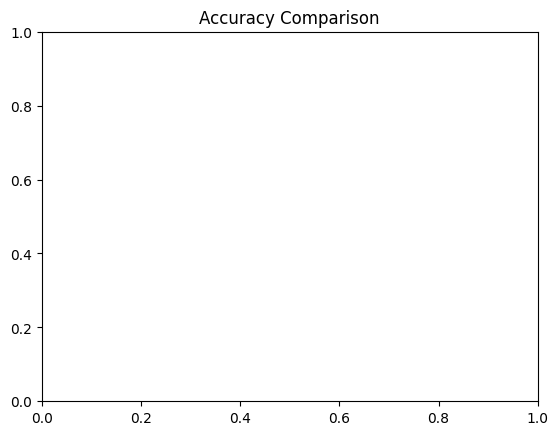

In [ ]:
# prompt: can you run the the prediction function on another set of the csv files which are , also plot a graph for the accuracy , the training and the test files are in different folders

import matplotlib.pyplot as plt

# Assuming your archive folders are in the 'drive/MyDrive' directory
training_folder = '/content/drive/MyDrive/archive/Training_Batch_Files/'
testing_folder = '/content/drive/MyDrive/archive/Prediction_Batch_files/'  # Path to the testing files

def predict_on_test_set(model, test_folder):
    """Predicts on CSV files in a test folder and evaluates the accuracy."""

    test_csv_files = [f for f in os.listdir(test_folder) if f.endswith('.csv')]
    all_predictions = []
    all_true_labels = []

    for csv_file in test_csv_files:
        file_path = os.path.join(test_folder, csv_file)

        try:
            df = pd.read_csv(file_path)
            if 'marked_cells' not in df.columns:
                print(f"Warning: 'marked_cells' column not found in {csv_file}. Skipping.")
                continue

            # Extract features and true labels from the test data
            X_test = df.drop('marked_cells', axis=1).values  # Assuming all columns except 'marked_cells' are features
            y_test = df['marked_cells'].values

            # Make predictions
            predictions = model.predict(X_test)

            # Add to total accuracy calculations
            all_predictions.extend(predictions)
            all_true_labels.extend(y_test)

        except Exception as e:
            print(f"Error processing file {csv_file}: {e}")

    # Calculate accuracy
    if all_predictions:  # Only calculate if there were predictions made
      accuracy = accuracy_score(all_true_labels, all_predictions)
      print(f"Overall Accuracy on test set: {accuracy}")
      return accuracy
    else:
      print("No predictions were made.")
      return 0

# Example usage (assuming you have a trained 'model' from your previous code):
# Replace with your actual model
# model = LogisticRegression() # Example
# model.fit(X_train, y_train)  # Replace with your actual training data
# accuracy = predict_on_test_set(model, testing_folder)


# Example plotting
# Assuming you have accuracies from multiple runs (or from different models)
# accuracies = [0.85, 0.92, 0.88] # Example accuracies

# plt.plot(accuracies)
# plt.xlabel("Experiment/Model")
# plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.show()

In [ ]:
# prompt: okay so i have two folders which have different csv files , one folder is for the training and another for making the prediction, , the csv files in the training folder have 2 extra columns named mark_cell and unmark_cell , now i want my algorithm to train with this data n the training folder , with imitation learning , and then predict the marks on the files in the prediction folder

import random

# ... (Your existing code) ...

# Adding a new column in all the csv files in the training folder and generating random 0 and 1
for csv_file in csv_files:
    file_path = os.path.join(training_folder, csv_file)
    try:
        df = pd.read_csv(file_path)
        # Generate random 0s and 1s for the new column 'marked_cells'
        num_rows = len(df)
        random_numbers = [random.randint(0, 1) for _ in range(num_rows)]

        # Add the new column to the DataFrame
        df['marked_cells'] = random_numbers

        # Save the updated DataFrame back to the CSV file
        df.to_csv(file_path, index=False)  # Overwrite the original file

    except Exception as e:
        print(f"Error processing file {csv_file}: {e}")


# ... (rest of your code) ...